# Wine quality data set
Contamos valores nulos

Cargamos las lbrerias y el dataset y revisamos si tiene valores nulos

In [9]:
import pandas as pd 
import numpy as np
import math
from sklearn.impute import SimpleImputer
import seaborn as sns

In [10]:
df = pd.read_csv('./wineq.csv')
print(df.head())
df.describe() 

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [11]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [12]:
dft = df['type'].value_counts()
print(dft)

type
white    4898
red      1599
Name: count, dtype: int64


Existe un desbalanceo de clases donde la clase mayoritaria resulta ser white wine y la minoritaria red wine, por lo tanto para hacer imputacion en los datos se segregara a las clases para distinguir bien los rasgos de una clase respecto de la otra

In [13]:
whitedf = df[df['type'] == 'white']
whitedf = whitedf.drop(['type'], axis=1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
i_whitedf = imputer.fit_transform(whitedf)
whitedf = pd.DataFrame(i_whitedf, columns=whitedf.columns)
print(whitedf.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [14]:
reddf = df[df['type'] == 'red']
reddf = reddf.drop(['type'], axis=1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
i_reddf = imputer.fit_transform(reddf)
reddf = pd.DataFrame(i_reddf, columns=reddf.columns)
print(reddf.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [15]:
dft = pd.concat([reddf, whitedf], ignore_index=True)
print(dft)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4          0.700000         0.00             1.9      0.076   
1               7.8          0.880000         0.00             2.6      0.098   
2               7.8          0.760000         0.04             2.3      0.092   
3              11.2          0.280000         0.56             1.9      0.075   
4               7.4          0.700000         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2          0.210000         0.29             1.6      0.039   
6493            6.6          0.320000         0.36             8.0      0.047   
6494            6.5          0.278252         0.19             1.2      0.041   
6495            5.5          0.290000         0.30             1.1      0.022   
6496            6.0          0.210000         0.38             0.8      0.020   

      free sulfur dioxide  

In [16]:
fill_df = pd.concat([df['type'], dft], axis=1)
print(fill_df.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


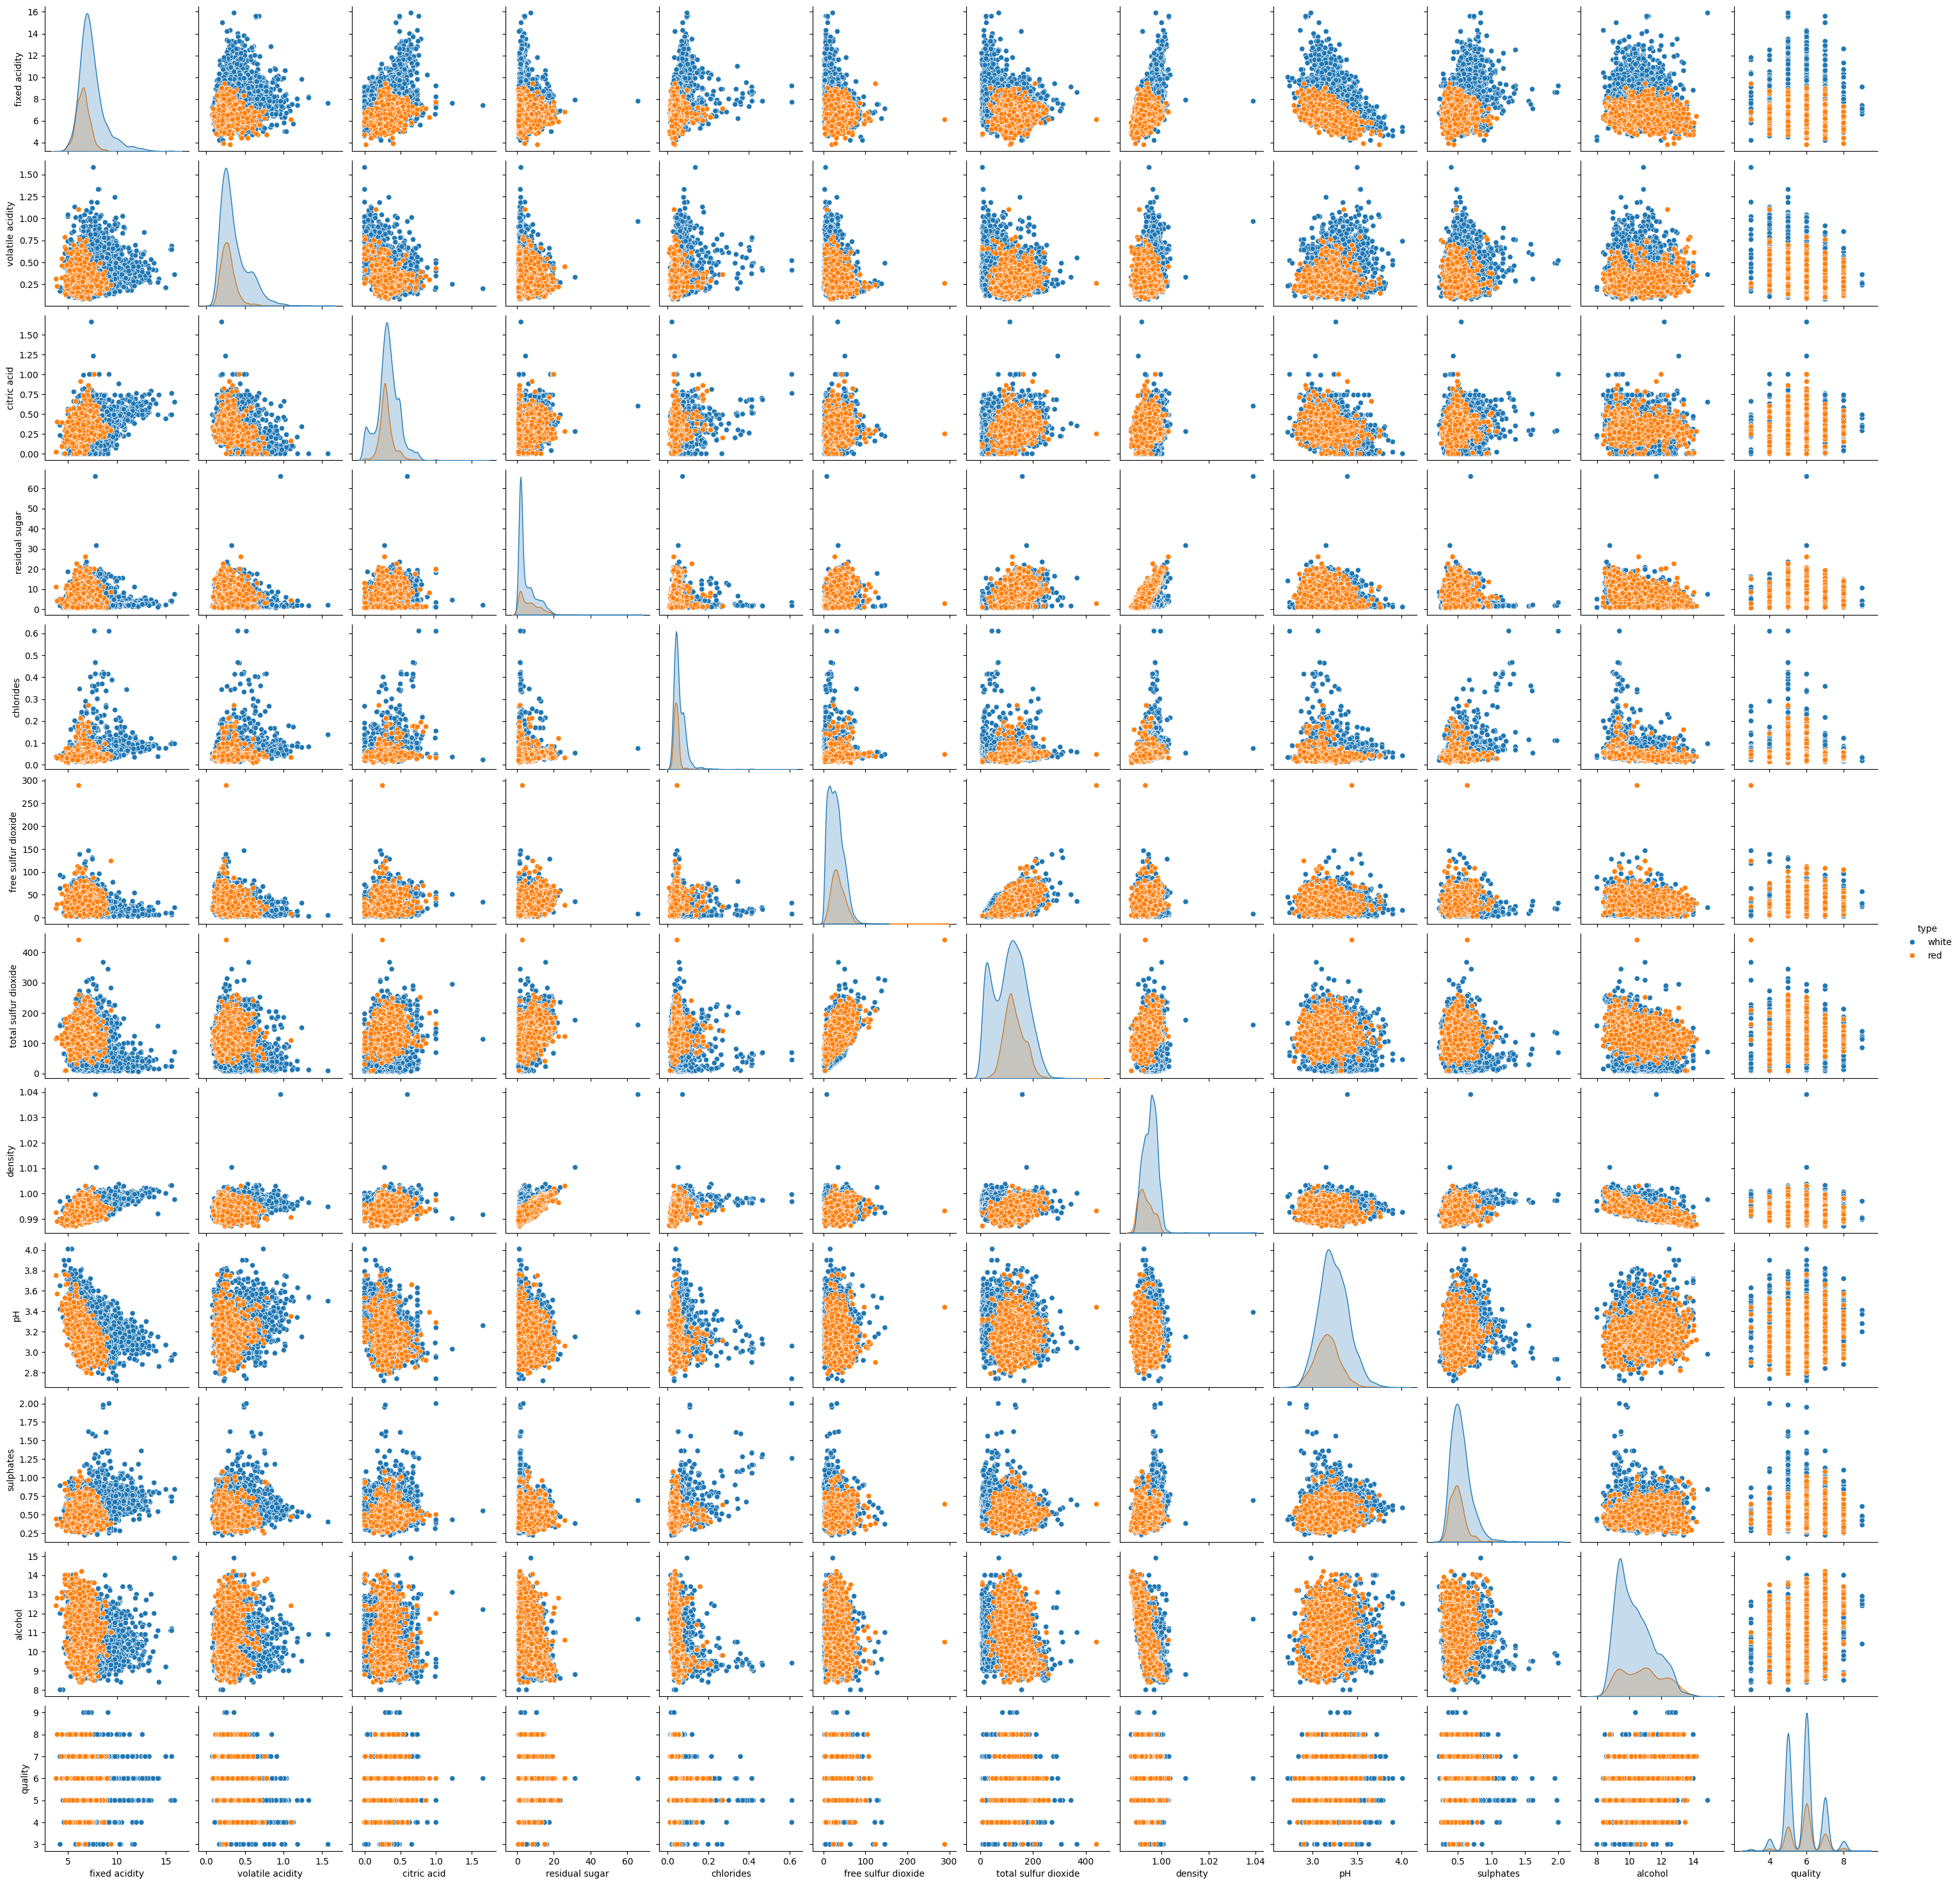

In [10]:
sns.pairplot(fill_df, hue='type')

### Ahora procedemos a hacer un undersampling tomando a red wine como clase minoritaria
Primero hacemos la separacion del dataset entre clases


In [17]:
class_min = fill_df[df['type'] == 'red']
class_maj = fill_df[df['type'] == 'white']
class_maj_sampled = class_maj.sample(len(class_min))
balanced_df = pd.concat([class_maj_sampled, class_min])
print(balanced_df)
dft = balanced_df['type'].value_counts()
print(dft)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
790   white            7.4          0.370000         0.43            2.60   
4861  white            7.6          0.190000         0.32           18.75   
1374  white            6.8          0.815000         0.00            1.20   
1519  white            6.6          0.700000         0.08            2.60   
1370  white            8.7          0.780000         0.51            1.70   
...     ...            ...               ...          ...             ...   
6492    red            6.2          0.210000         0.29            1.60   
6493    red            6.6          0.320000         0.36            8.00   
6494    red            6.5          0.278252         0.19            1.20   
6495    red            5.5          0.290000         0.30            1.10   
6496    red            6.0          0.210000         0.38            0.80   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

In [18]:
balanced_df.to_csv('clean_wine.csv', sep=',', index=False, encoding='utf-8')

Ahora hacemos el pairplot para ver como quedo el dataset

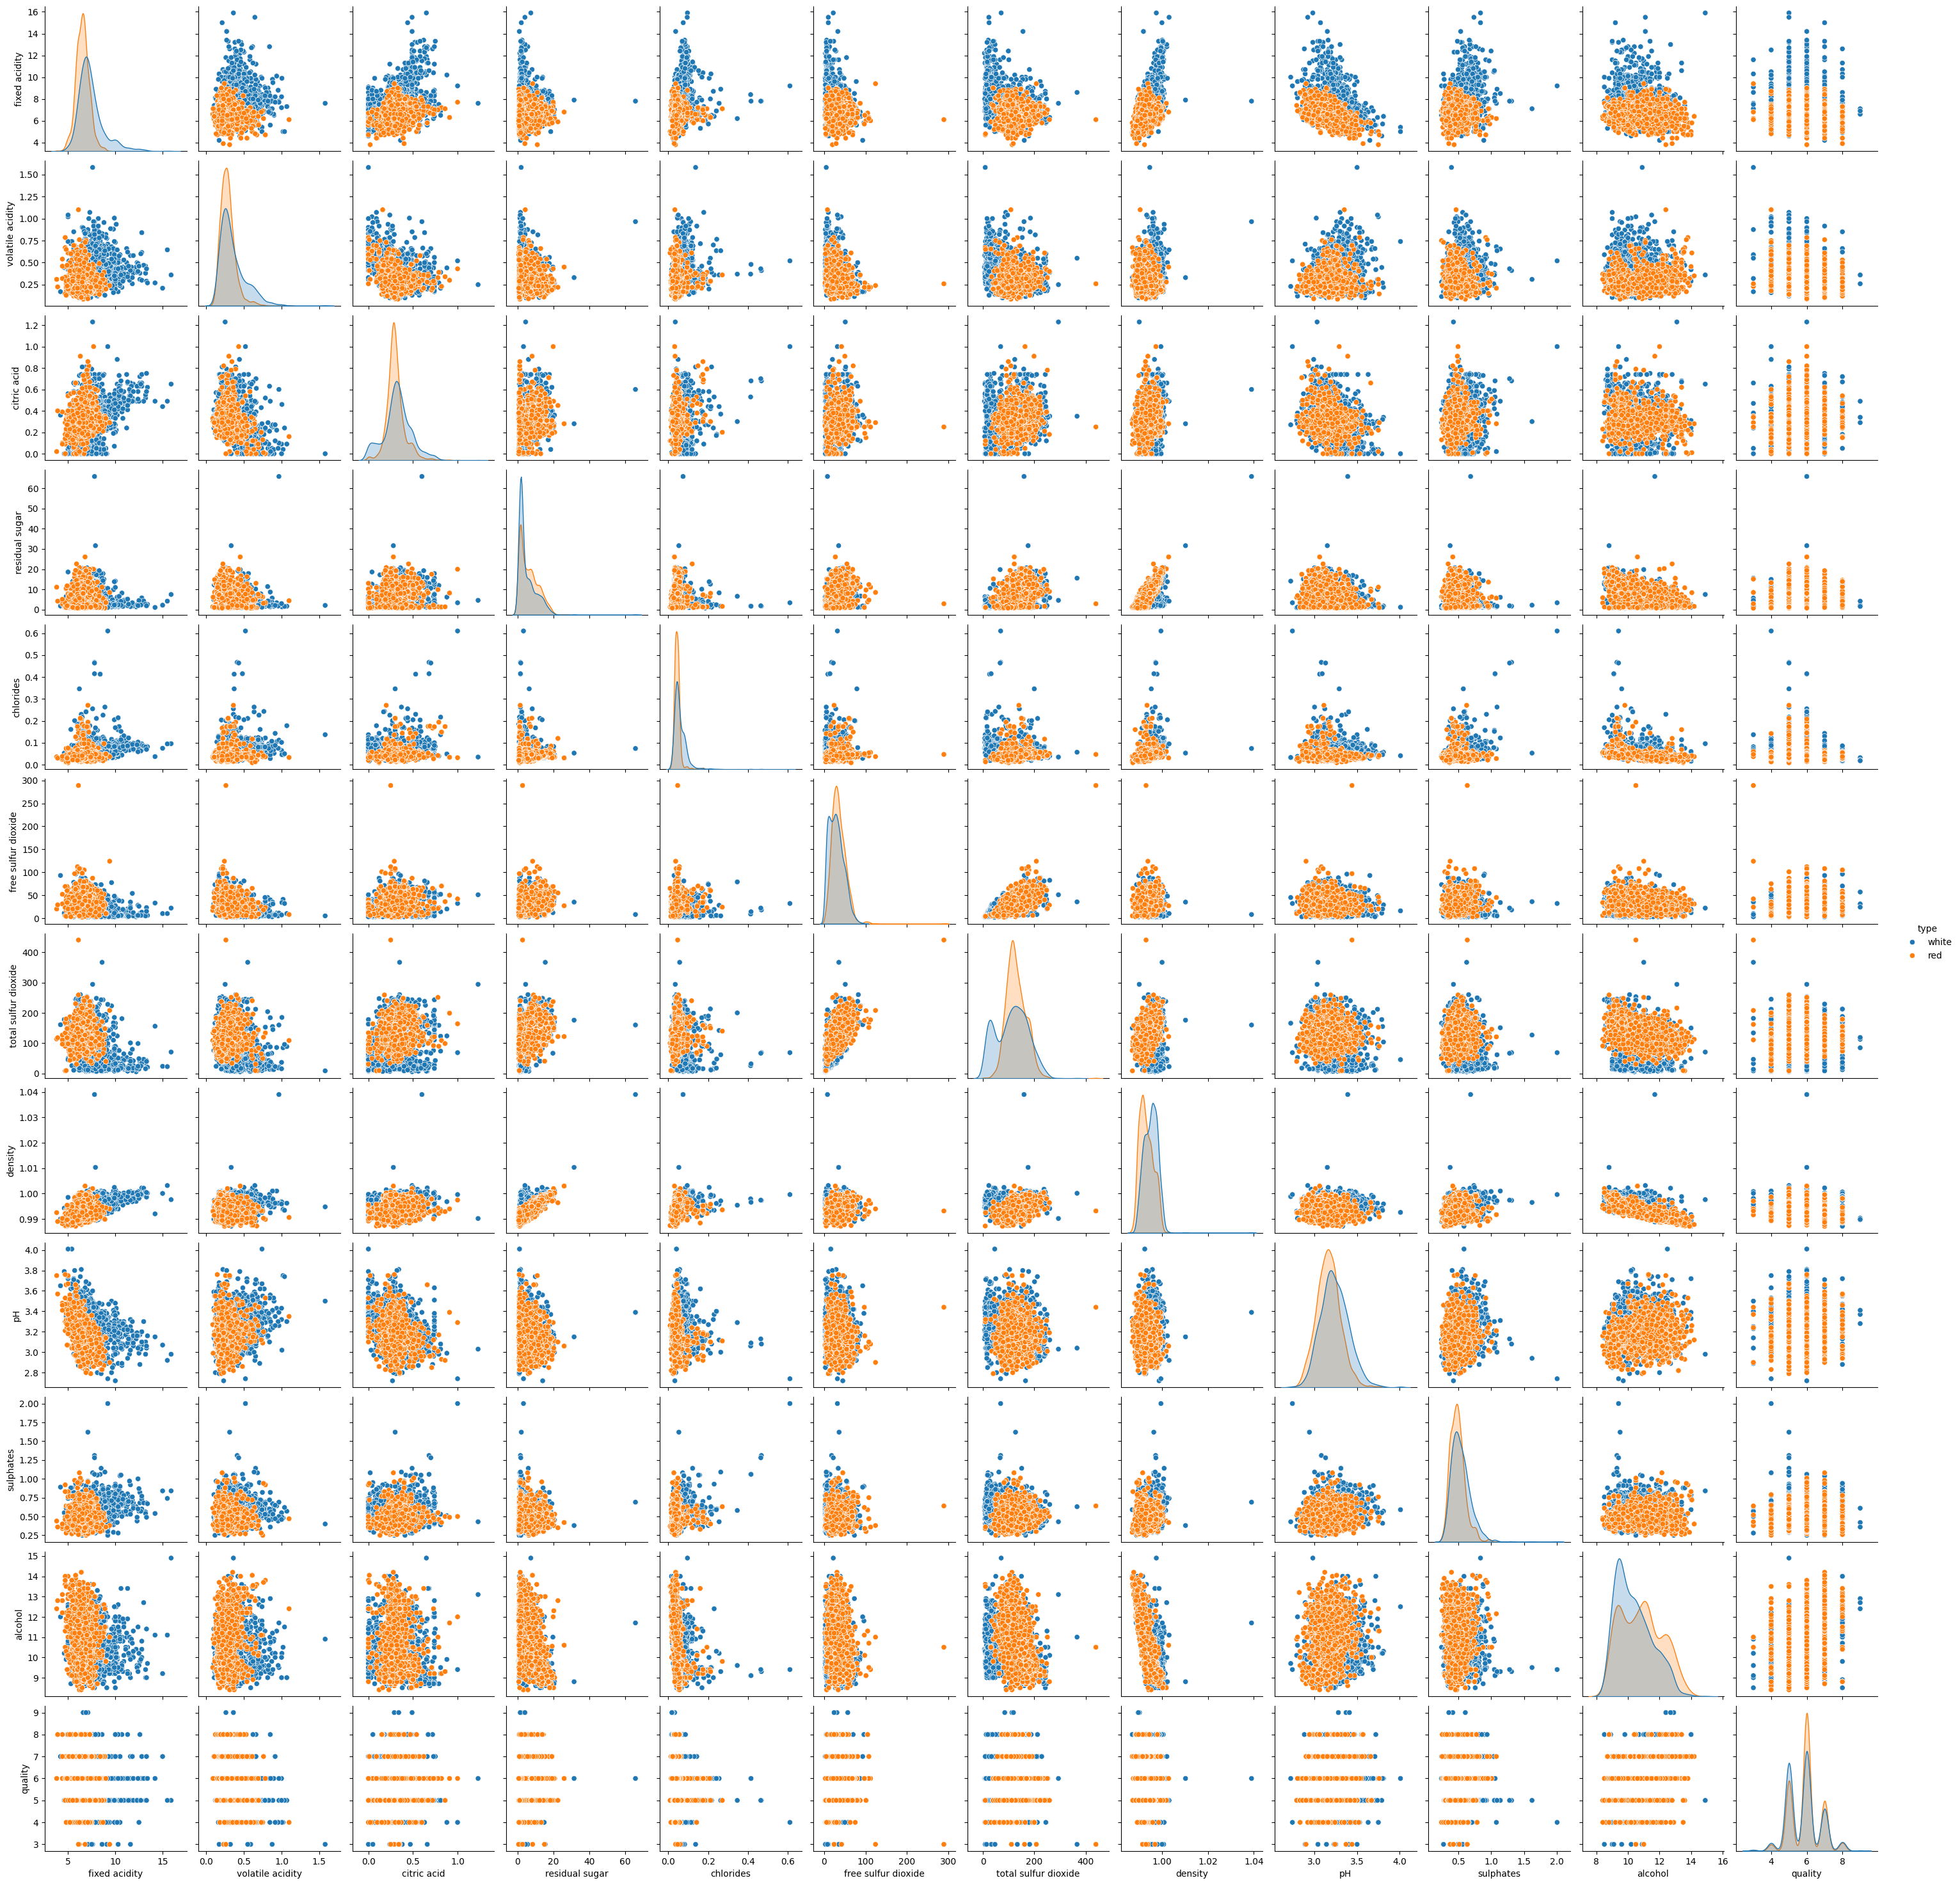

In [13]:
sns.pairplot(balanced_df, hue='type')

In [19]:
aux_df = balanced_df.drop(columns=['type'])
aux_df.corrwith(aux_df['quality'])

fixed acidity          -0.101709
volatile acidity       -0.245642
citric acid             0.062355
residual sugar         -0.032264
chlorides              -0.217977
free sulfur dioxide     0.047624
total sulfur dioxide   -0.059742
density                -0.312978
pH                      0.004278
sulphates               0.017593
alcohol                 0.441011
quality                 1.000000
dtype: float64

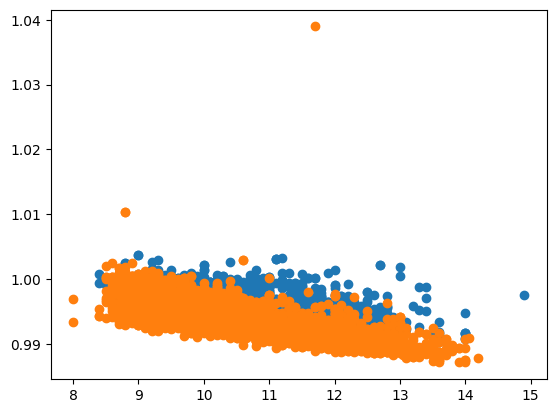

In [20]:
import matplotlib.pyplot as plt
plt.scatter(reddf['alcohol'], reddf['density'])
plt.scatter(whitedf['alcohol'], whitedf['density'])
plt.show()

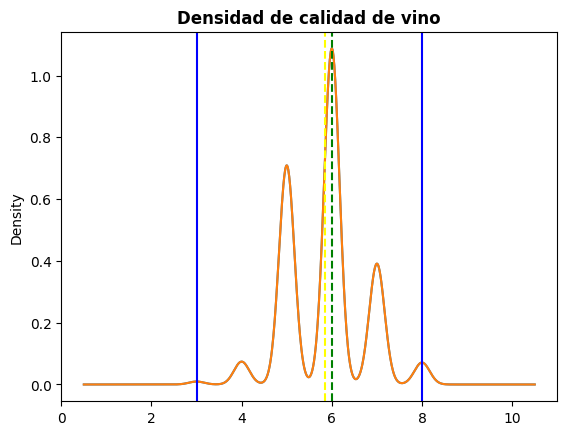

In [21]:
def show_distribution(var_data):
    mn = var_data.mean()
    mdn = var_data.median()
    min = var_data.max()
    max = var_data.min()
    var_data.plot(kind='density')
    var_data.plot.density()
    plt.title('Densidad de calidad de vino', fontweight = "bold")
    plt.axvline(x=mn, linestyle='--', color='yellow')
    plt.axvline(x=mdn, linestyle='--', color='green')
    plt.axvline(x=min, linestyle='-', color='blue')
    plt.axvline(x=max, linestyle='-', color='blue')
    plt.show()

var = balanced_df['quality']
show_distribution(var)

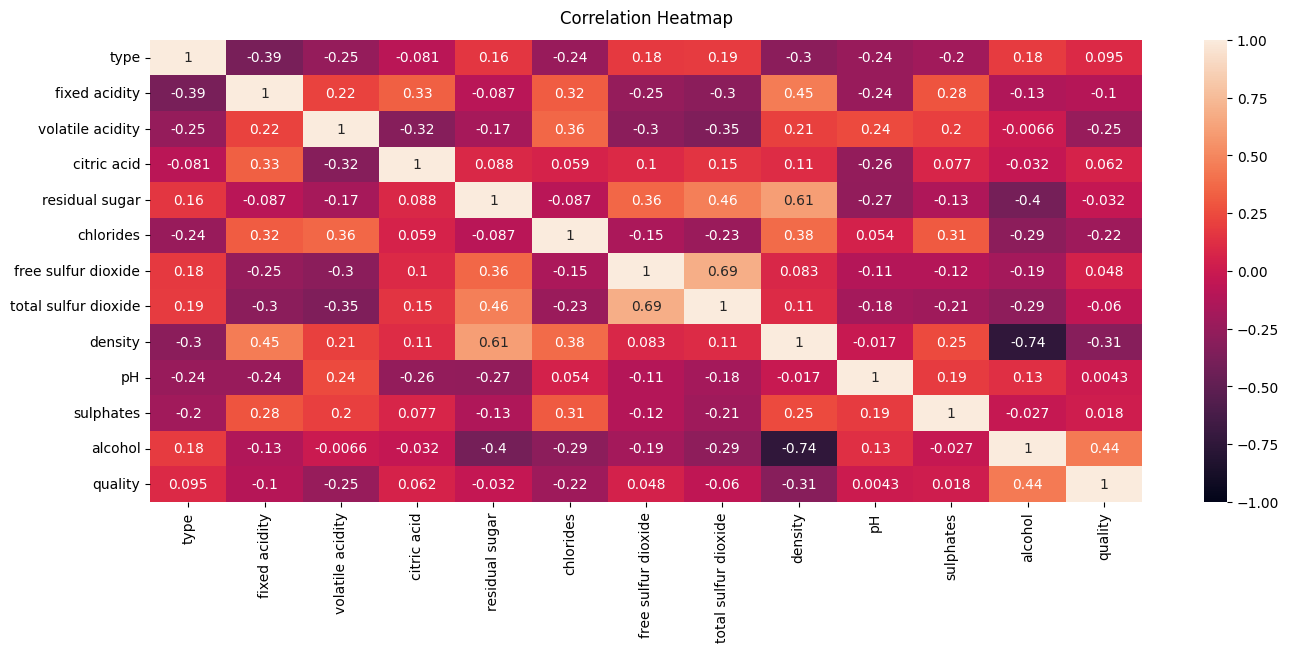

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
balanced_df['type'] = balanced_df['type'].map({'white': 0, 'red':1})
heatmap = sns.heatmap(balanced_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);